
<center><h1>Assignment 2</h1></center>

## Problem statement
Implementing Feedforward neural networks with Keras and TensorFlow

## Details
1. Name : Akash Kulkarni
2. Branch : Information Technology
3. Division : BE 10
4. Batch : R-10
5. Roll Number : 43241
6. Course : Laboratory Practice 4 (Deep Learning)


In [2]:
#installations
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#grabbing the mnist dataset
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [4]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [5]:
#building the model
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

2022-10-30 22:02:38.854009: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-30 22:02:38.854047: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-30 22:02:38.854077: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (akash-kulkarni): /proc/driver/nvidia/version does not exist
2022-10-30 22:02:38.854372: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
sgd = SGD(0.01)
epochs=10
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

Epoch 1/10


2022-10-30 22:02:38.996762: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


453/469 [===========================>..] - ETA: 0s - loss: 2.3006 - accuracy: 0.1361

2022-10-30 22:02:41.955286: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


469/469 [==============================] - 3s 5ms/step - loss: 2.2994 - accuracy: 0.1371 - val_loss: 2.2622 - val_accuracy: 0.1710
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 2.2405 - accuracy: 0.2912 - val_loss: 2.2143 - val_accuracy: 0.3557
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 2.1859 - accuracy: 0.4615 - val_loss: 2.1494 - val_accuracy: 0.5123
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 2.1089 - accuracy: 0.5548 - val_loss: 2.0556 - val_accuracy: 0.5716
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 1.9969 - accuracy: 0.6003 - val_loss: 1.9206 - val_accuracy: 0.6200
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 1.8423 - accuracy: 0.6303 - val_loss: 1.7437 - val_accuracy: 0.6536
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 1.6547 - accuracy: 0.6548 - val_loss: 1.5457 - val_accuracy: 0.6929
Epoch 8/10
469/46

In [7]:
#making the predictions
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

28/79 [=========>....................] - ETA: 0s

2022-10-30 22:03:00.369454: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       980
           1       0.76      0.99      0.86      1135
           2       0.80      0.69      0.74      1032
           3       0.60      0.85      0.71      1010
           4       0.71      0.80      0.75       982
           5       0.87      0.19      0.31       892
           6       0.82      0.91      0.86       958
           7       0.77      0.86      0.81      1028
           8       0.80      0.57      0.67       974
           9       0.74      0.61      0.67      1009

    accuracy                           0.75     10000
   macro avg       0.77      0.74      0.73     10000
weighted avg       0.77      0.75      0.73     10000



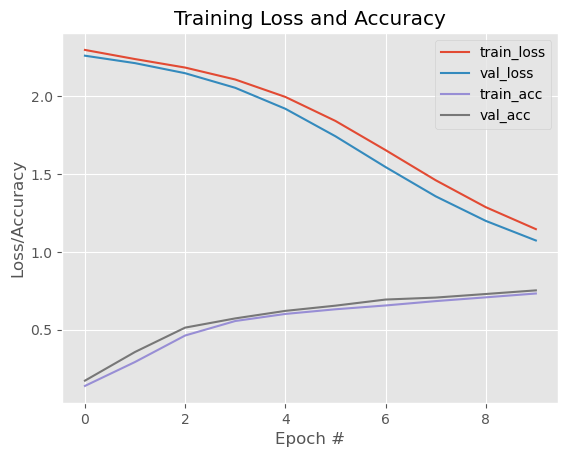

In [8]:
#plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()